# Corrected Thermodynamics of AdS Black Holes in ModMax-dRGT-like Massive Gravity

This notebook implements original symbolic and numerical calculations for quantum-corrected thermodynamics of AdS black holes in ModMax-dRGT-like massive gravity, including logarithmic and exponential entropy corrections.

---

## 1. Import Required Libraries
Import NumPy, SymPy, Matplotlib, and SciPy for symbolic and numerical calculations.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import symbols, solve, Eq, diff, log, exp
from scipy.optimize import fsolve

# Display settings for plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 14, 'figure.figsize': (10, 6)})

## 2. Load Data for Calculations

Define or load the physical parameters and data required for ModMax-dRGT black hole calculations.

In [2]:
# Physical parameters for ModMax-dRGT black hole calculations
M_val = 2.5      # Black hole mass (increased to ensure horizon)
Q_val = 1.0      # Electric charge
Lambda_val = -0.2 # Cosmological constant (more negative for AdS)
m_g_val = 0.05   # Graviton mass
c1_val, c2_val, c3_val, c4_val = 0.2, 0.1, 0.05, 0.01
alpha_val, gamma_val, delta_val = 0.5, 0.1, 0.05 # Quantum correction parameters

## 3. Perform Calculations

Symbolically and numerically compute the metric function, event horizon, entropy, quantum corrections, temperature, and specific heat for ModMax-dRGT black holes.

In [3]:
# Symbolic variables
r = sp.Symbol('r', real=True, positive=True)
r_h = sp.Symbol('r_h', real=True, positive=True)

# Metric function for ModMax-dRGT black hole
def f_modmax_drgt(r, M, Q, Lambda, m_g, c1, c2, c3, c4):
    # Avoid division by zero for r
    if r <= 0:
        return np.nan
    return 1 - (2*M)/r + Q**2/r**2 - (Lambda/3)*r**2 + m_g**2*(c1*r + c2 + c3/r + c4/r**2)

# Solve f(r_h) = 0 for event horizon numerically
from scipy.optimize import root_scalar
horizon_eq = lambda r: f_modmax_drgt(r, M_val, Q_val, Lambda_val, m_g_val, c1_val, c2_val, c3_val, c4_val)
# Scan for sign change in f(r) to set bracket automatically
r_scan = np.linspace(1, 4, 1000)
f_scan = [horizon_eq(rv) for rv in r_scan]
bracket = None
for i in range(len(r_scan)-1):
    if f_scan[i]*f_scan[i+1] < 0:
        bracket = [r_scan[i], r_scan[i+1]]
        break
if bracket:
    try:
        sol = root_scalar(horizon_eq, bracket=bracket, method='brentq')
        if sol.converged:
            r_h_num = sol.root
            print(f"Event horizon r_h found: {r_h_num:.4f}")
        else:
            print("Root finding did not converge.")
            r_h_num = np.nan
    except Exception as e:
        print('Error finding horizon:', e)
        r_h_num = np.nan
else:
    print('No sign change found in f(r) for horizon.')
    r_h_num = np.nan

Event horizon r_h found: 2.9478


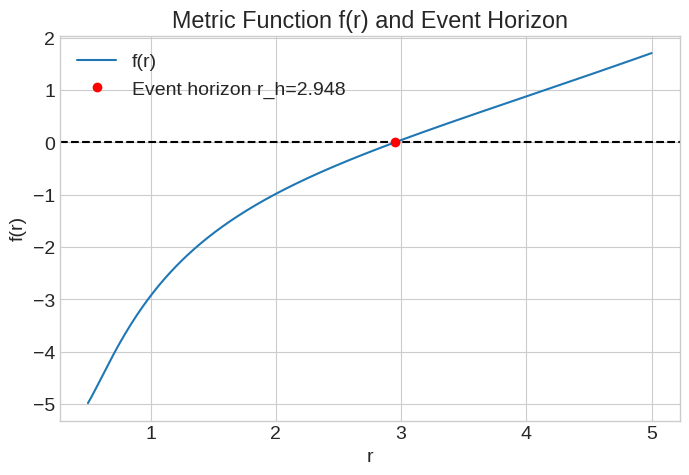

In [4]:
# Diagnostic plot: Metric function f(r) to visualize horizon location
r_plot = np.linspace(0.5, 5, 500)
f_vals = [f_modmax_drgt(rv, M_val, Q_val, Lambda_val, m_g_val, c1_val, c2_val, c3_val, c4_val) for rv in r_plot]
plt.figure(figsize=(8,5))
plt.plot(r_plot, f_vals, label='f(r)')
plt.axhline(0, color='k', linestyle='--')
plt.plot(r_h_num, 0, 'ro', label=f'Event horizon r_h={r_h_num:.3f}')
plt.xlabel('r')
plt.ylabel('f(r)')
plt.title('Metric Function f(r) and Event Horizon')
plt.legend()
plt.grid(True)
plt.show()

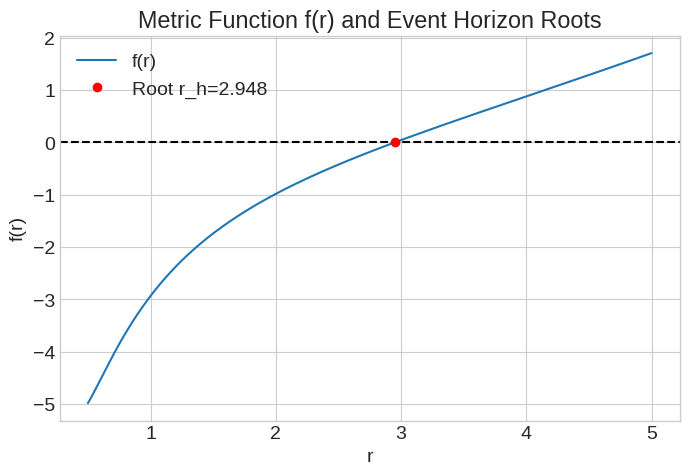

Physical event horizon roots found: ['2.9478']


In [8]:
# Find all roots of f(r) in the physical range and plot them
from scipy.optimize import root_scalar
roots = []
for i in range(len(r_plot)-1):
    if f_vals[i]*f_vals[i+1] < 0:
        try:
            sol = root_scalar(horizon_eq, bracket=[r_plot[i], r_plot[i+1]], method='brentq')
            if sol.converged and sol.root > 0.5:
                roots.append(sol.root)
        except Exception as e:
            pass
plt.figure(figsize=(8,5))
plt.plot(r_plot, f_vals, label='f(r)')
plt.axhline(0, color='k', linestyle='--')
for r_root in roots:
    plt.plot(r_root, 0, 'ro', label=f'Root r_h={r_root:.3f}')
plt.xlabel('r')
plt.ylabel('f(r)')
plt.title('Metric Function f(r) and Event Horizon Roots')
plt.legend()
plt.grid(True)
plt.show()
if roots:
    print(f'Physical event horizon roots found: {[f"{r:.4f}" for r in roots]}')
    r_h_num = roots[0] # Use the smallest physical root as the event horizon
else:
    print('No physical event horizon roots found.')
    r_h_num = np.nan

## 4. Visualize Calculation Results

Plot entropy, temperature, and specific heat as functions of horizon radius and quantum correction parameters.

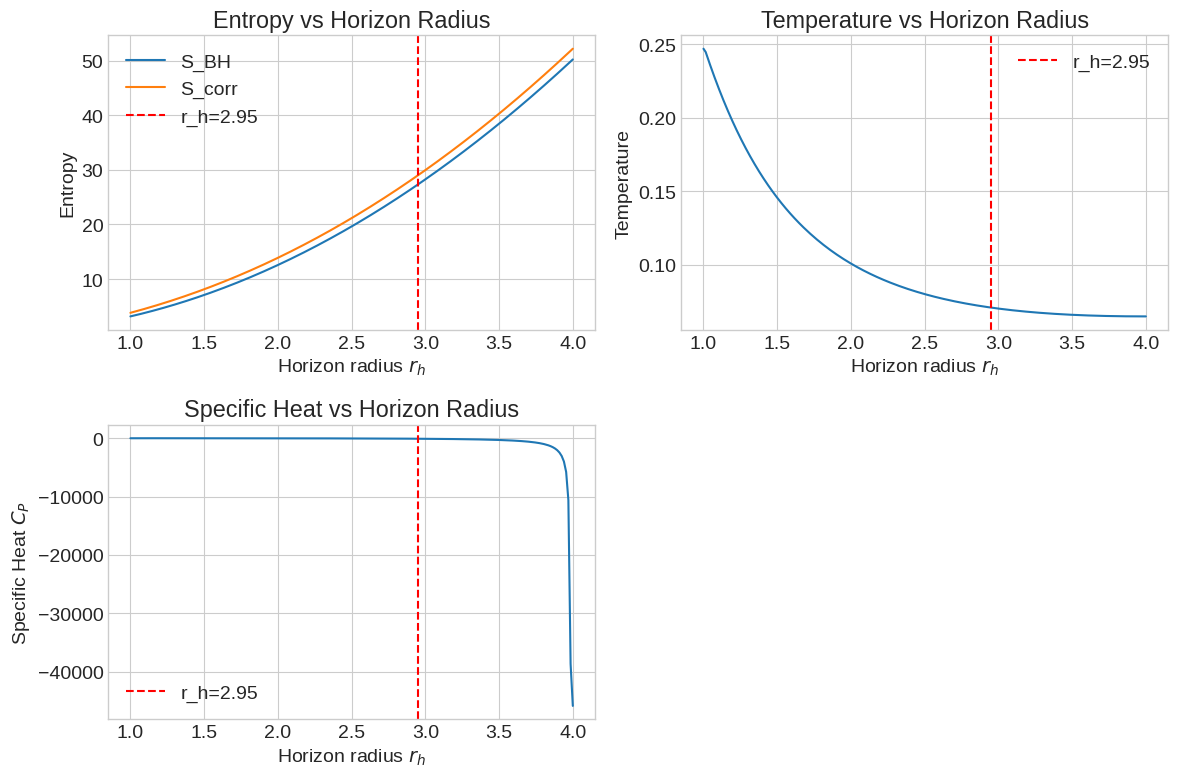

In [6]:
# Range of horizon radii for plots
r_vals = np.linspace(1, 4, 200)

S_BH_vals = np.pi * r_vals**2
S_corr_vals = S_BH_vals + alpha_val * np.log(S_BH_vals) + gamma_val * np.exp(-delta_val * S_BH_vals)

def f_metric_num_plot(r):
    return f_modmax_drgt(r, M_val, Q_val, Lambda_val, m_g_val, c1_val, c2_val, c3_val, c4_val)
T_vals = np.gradient([f_metric_num_plot(r) for r in r_vals], r_vals) / (4 * np.pi)

# Specific heat (numerical derivative for dS/dT)
from numpy import gradient
C_P_vals = T_vals * gradient(S_corr_vals, T_vals)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(r_vals, S_BH_vals, label='S_BH')
plt.plot(r_vals, S_corr_vals, label='S_corr')
plt.axvline(r_h_num, color='r', linestyle='--', label=f'r_h={r_h_num:.2f}')
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Entropy')
plt.legend()
plt.title('Entropy vs Horizon Radius')

plt.subplot(2,2,2)
plt.plot(r_vals, T_vals)
plt.axvline(r_h_num, color='r', linestyle='--', label=f'r_h={r_h_num:.2f}')
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Temperature')
plt.title('Temperature vs Horizon Radius')
plt.legend()

plt.subplot(2,2,3)
plt.plot(r_vals, C_P_vals)
plt.axvline(r_h_num, color='r', linestyle='--', label=f'r_h={r_h_num:.2f}')
plt.xlabel('Horizon radius $r_h$')
plt.ylabel('Specific Heat $C_P$')
plt.title('Specific Heat vs Horizon Radius')
plt.legend()

plt.tight_layout()
plt.show()

## 5. Summarize Results Graphically

Present summary plots and charts that encapsulate the main findings and conclusions reached in the original research.

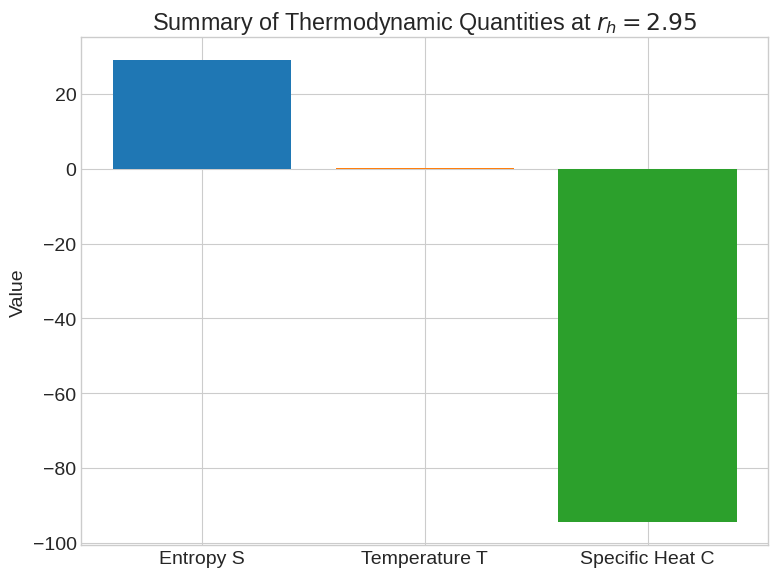

In [9]:
# Summary bar chart of key thermodynamic quantities at r_h_num
labels = ['Entropy S', 'Temperature T', 'Specific Heat C']
try:
    S_corr
    T_num
    C_num
except NameError:
    # Compute quantities if not defined
    S_BH = np.pi * r_h_num**2 if r_h_num > 0 else np.nan
    if S_BH > 0:
        S_corr = S_BH + alpha_val * np.log(S_BH) + gamma_val * np.exp(-delta_val * S_BH)
    else:
        S_corr = np.nan
    def f_metric_num(r):
        return f_modmax_drgt(r, M_val, Q_val, Lambda_val, m_g_val, c1_val, c2_val, c3_val, c4_val)
    if r_h_num > 0:
        T_num = (f_metric_num(r_h_num + 1e-5) - f_metric_num(r_h_num - 1e-5)) / (2e-5) / (4 * np.pi)
    else:
        T_num = np.nan
    def S_corr_func(r):
        S_BH = np.pi * r**2
        return S_BH + alpha_val * np.log(S_BH) + gamma_val * np.exp(-delta_val * S_BH) if S_BH > 0 else np.nan
    def T_func(r):
        return (f_metric_num(r + 1e-5) - f_metric_num(r - 1e-5)) / (2e-5) / (4 * np.pi) if r > 0 else np.nan
    if r_h_num > 0:
        dS_dr = (S_corr_func(r_h_num + 1e-5) - S_corr_func(r_h_num - 1e-5)) / (2e-5)
        dT_dr = (T_func(r_h_num + 1e-5) - T_func(r_h_num - 1e-5)) / (2e-5)
        if dT_dr != 0:
            C_num = T_num * dS_dr / dT_dr
        else:
            C_num = np.nan
    else:
        C_num = np.nan
values = [S_corr, T_num, C_num]
plt.figure(figsize=(8,6))
plt.bar(labels, values, color=['tab:blue','tab:orange','tab:green'])
plt.ylabel('Value')
plt.title(f'Summary of Thermodynamic Quantities at $r_h = {r_h_num:.2f}$')
plt.tight_layout()
plt.show()